In [23]:
import os 
import pandas as pd
import numpy as np
from pydub import AudioSegment

import IPython.display as ipd

import librosa
import librosa.display
import matplotlib.pyplot as plt

import processing

In [24]:
import sys
sys.path.insert(1, '/Users/bastienorset/Documents/git/tqwt_tools')

In [25]:
from tqwt_tools import DualQDecomposition
from tqwt_tools.util import (
    low_resonance_test_signal, 
    high_resonance_test_signal, 
    speech_signal, 
    music_signal
)

In [26]:
def decompose_and_plot(x: np.ndarray, dq_params: dict, figsize: tuple = (16, 10), 
                       display_audio: bool = False):
    # perform decomposition
    dq = DualQDecomposition(**dq_params)
    x1, x2 = dq(x)
    return x1,x2

In [27]:
audio_folder = '../../data/ICBHI_final_database'

In [65]:
audio_subject = '107_2b3_Ar_mc_AKGC417L'  #wheeze example
audio_data_file, audio_event_file,tyxt = processing.load_file_from_recording_name(audio_folder,audio_subject)
data_filtered_original = processing.preprocess_data(audio_data_file, audio_event_file)
data_feature_original = processing.apply_stft(data_filtered_original,n_fft=40)

In [66]:
dq_params = {
    'q1': 6,
    'redundancy_1': 3,
    'stages_1': 32,
    'q2': 1,
    'redundancy_2': 3,
    'stages_2': 3,
    'lambda_1': 0.1,
    'lambda_2': 0.1,
    'mu': 0.5,
    'num_iterations': 80,
    'compute_cost_function': True
}

x1,x2 = decompose_and_plot(data_filtered_original['data'], dq_params)

(0.0, 20.0)

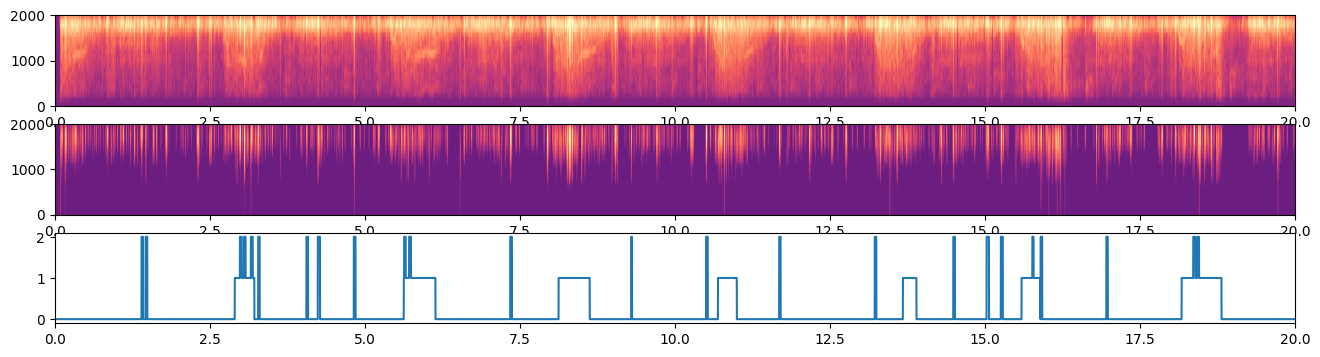

In [67]:
data_filtered_low = data_filtered_original.copy()
data_filtered_low['data'] = x2
data_feature = processing.apply_stft(data_filtered_low,n_fft=40)

f = plt.figure(figsize = (16,4))
ax = f.add_subplot(311)
ax.imshow(data_feature_original['data'], cmap='magma', aspect='auto', norm=None, vmax=0, vmin=-100,
          extent=[data_filtered_low['time'][0],data_filtered_low['time'][-1],data_feature_original['freq'][0],data_feature_original['freq'][-1]])
ax = f.add_subplot(312)
ax.imshow(data_feature['data'], cmap='magma', aspect='auto', norm=None, vmax=0, vmin=-100,
          extent=[data_filtered_original['time'][0],data_filtered_original['time'][-1],data_feature['freq'][0],data_feature['freq'][-1]])
ax = f.add_subplot(313)
ax.plot(data_filtered_low['time'],data_filtered_low['label'])
ax.set_xlim([data_filtered_low['time'][0],data_filtered_low['time'][-1]])


(0.0, 20.0)

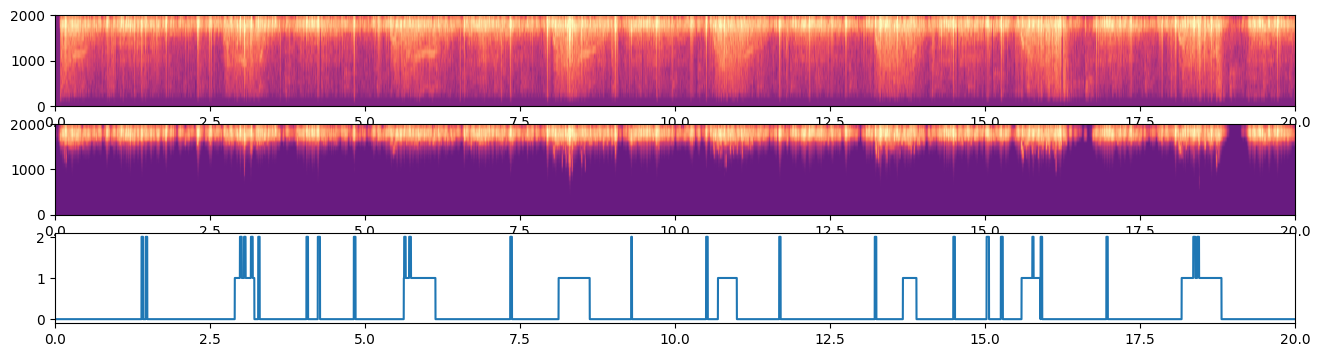

In [68]:
data_filtered_high = data_filtered_original.copy()
data_filtered_high['data'] = x1
data_feature = processing.apply_stft(data_filtered_high,n_fft=40)

f = plt.figure(figsize = (16,4))
ax = f.add_subplot(311)
ax.imshow(data_feature_original['data'], cmap='magma', aspect='auto', norm=None, vmax=0, vmin=-100,
          extent=[data_filtered_original['time'][0],data_filtered_original['time'][-1],data_feature_original['freq'][0],data_feature_original['freq'][-1]])
ax = f.add_subplot(312)
ax.imshow(data_feature['data'], cmap='magma', aspect='auto', norm=None, vmax=0, vmin=-100,
          extent=[data_filtered_original['time'][0],data_filtered_original['time'][-1],data_feature['freq'][0],data_feature['freq'][-1]])
ax = f.add_subplot(313)
ax.plot(data_filtered_low['time'],data_filtered_low['label'])
ax.set_xlim([data_filtered_low['time'][0],data_filtered_low['time'][-1]])


/Users/bastienorset/Documents/git/respiratory_sound/.venv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  return f(*args, **kwargs)


(0.0, 20.0)

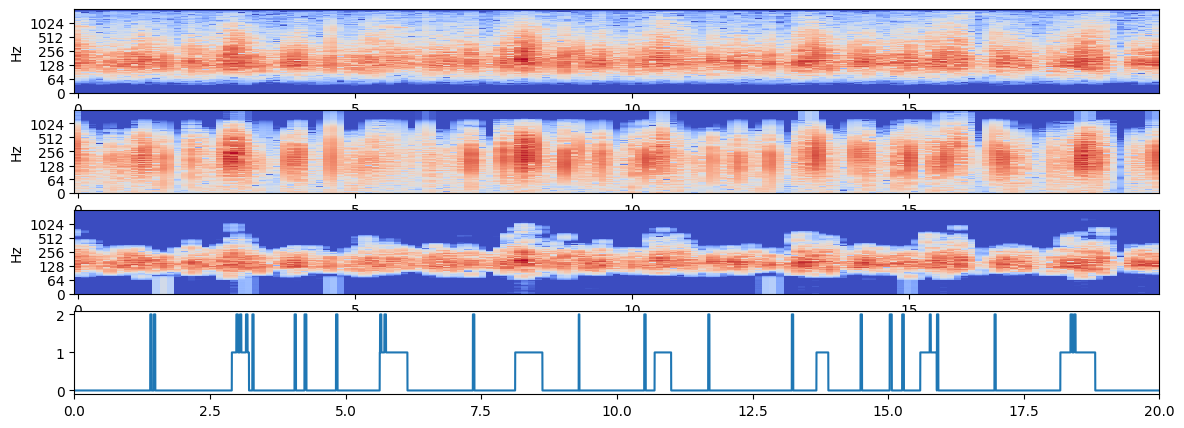

In [69]:
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(411)
X = librosa.stft(data_filtered_original['data'],center=False)
Xdb = librosa.amplitude_to_db(abs(X))
S_dB = librosa.power_to_db(X, ref=np.max)
librosa.display.specshow(Xdb, sr=data_filtered_original['fs'], x_axis='time', y_axis='log')


ax = f.add_subplot(412)
X = librosa.stft(data_filtered_low['data'],center=False)
Xdb = librosa.amplitude_to_db(abs(X))
S_dB = librosa.power_to_db(X, ref=np.max)
librosa.display.specshow(Xdb, sr=data_filtered_original['fs'], x_axis='time', y_axis='log')


ax = f.add_subplot(413)
X = librosa.stft(data_filtered_high['data'],center=False)
Xdb = librosa.amplitude_to_db(abs(X))
S_dB = librosa.power_to_db(X, ref=np.max)
librosa.display.specshow(Xdb, sr=data_filtered_original['fs'], x_axis='time', y_axis='log')

ax = f.add_subplot(414)
ax.plot(data_filtered_low['time'],data_filtered_low['label'])
ax.set_xlim([data_filtered_low['time'][0],data_filtered_low['time'][-1]])